<h2 style="color:orange">Neural Network Regression with TensorFlow</h2>

### Typical architecture of a regresison neural network

There are many different ways (actually, there's almost an infinite number of ways) to write neural networks. But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputting some kind of target number.

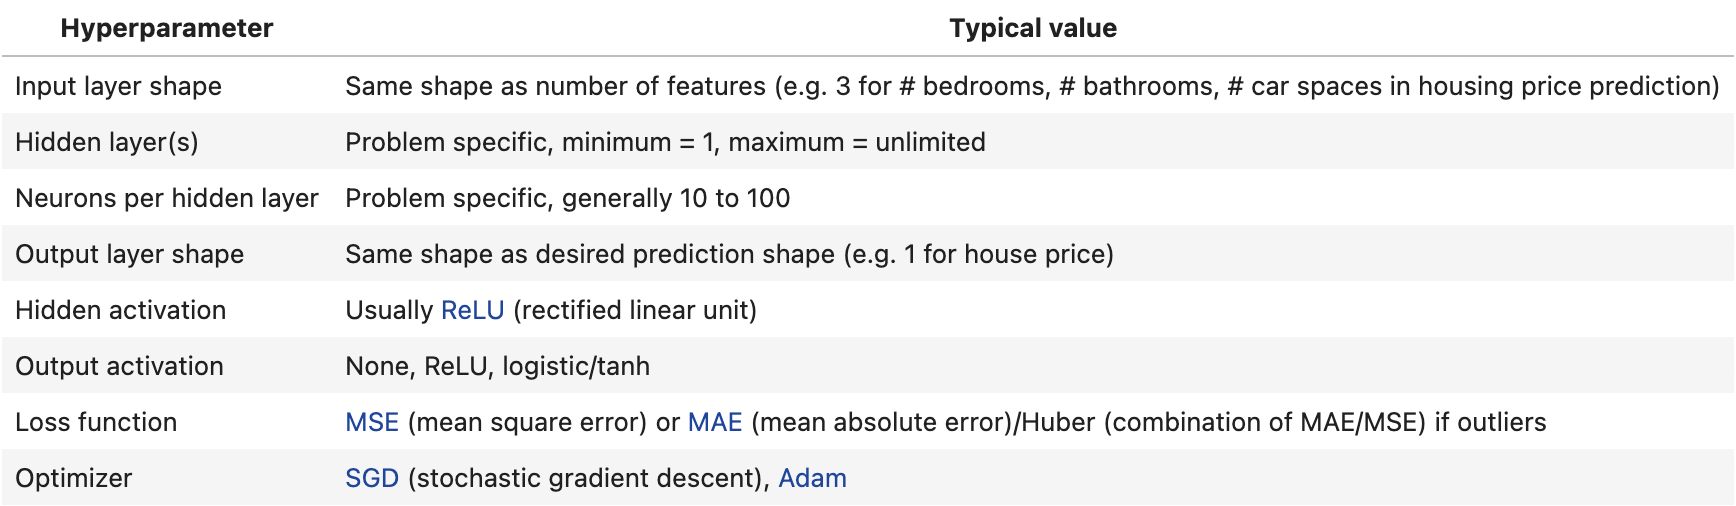

*Table 1: Typical architecture of a regression network. Source: Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


* A hyperparameter in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [2]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


<h3 style="color:orange">Create data to view and fit</h3>

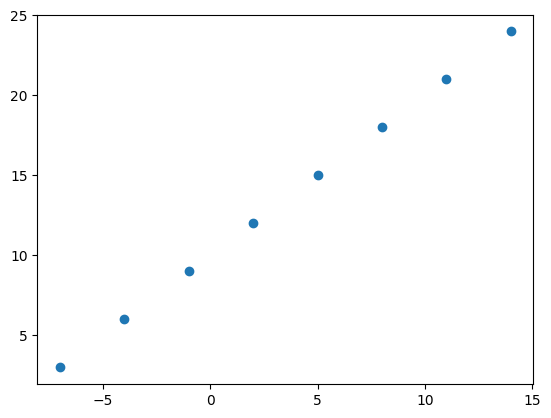

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X, y)

<h3 style="color:orange">Regression input shapes and output shapes</h3>

One of the most important concepts when working with neural networks are the input and output shapes.

* The `input shape` is the shape of your data that goes into the model.
* The `output shape` is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

In [4]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

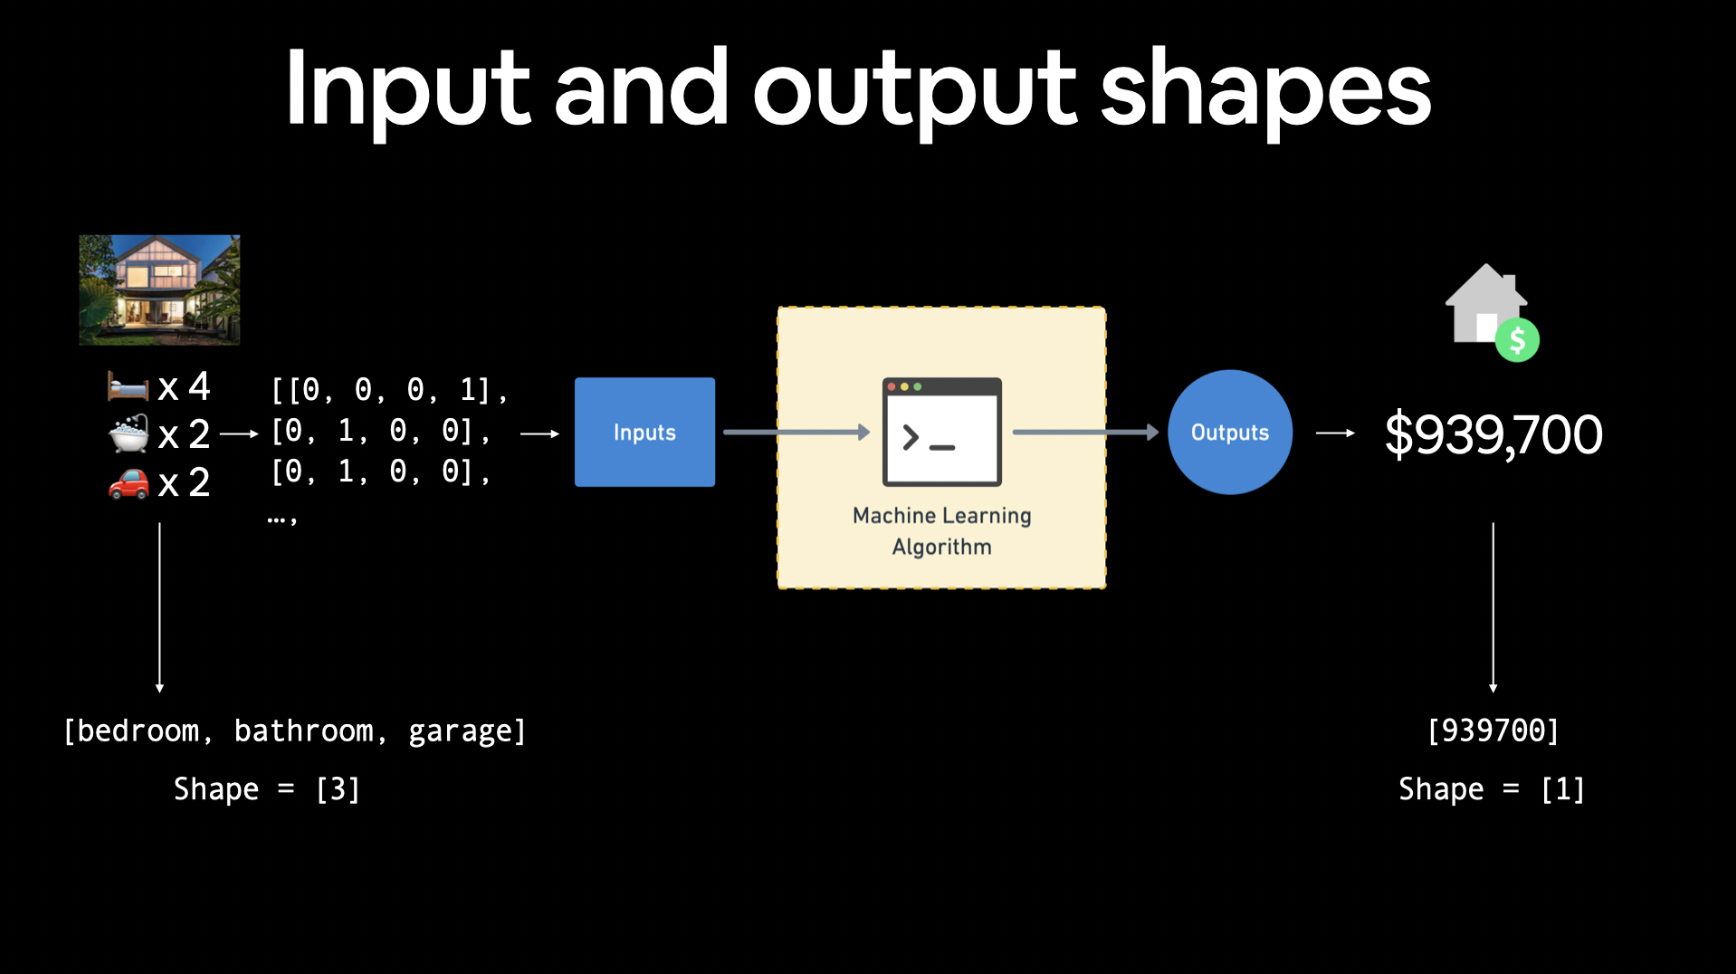

*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
# turn NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Our goal here will be to use X to predict y. So our input will be X and our output will be y.

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

In [9]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use one X value to predict one y value.

<h3 style="color:orange">Steps in modeling with TensorFlow</h3>

1. `Creating a model (Construct or import a pretrained model relevant to the problem)` - Define the input and output layers, as well as the hidden layers of a deep learning model.
2. `Compiling a model (prepare it to be used with data)` - Define the **loss function** (in other words, the function which tells our model how wrong it is compared to the truth labels, which we want to minimize) and the **optimizer** (tells our model how to update its internal patterns to better its predictions) and **evaluation metrics** (human interpretable values for how well the model is doing).
3. `Fitting a model to the training data so it can discover patterns` - Letting the model try to find the patterns between X & y (features and labels) using **epochs** (how many times the model will go through all of the training examples).
4. `Evaluate the model on the test data` - How reliable are our model's predictions?

In [10]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 21.9571 - mae: 21.9571
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.5640 - mae: 21.5640
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 21.1709 - mae: 21.1709
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.7777 - mae: 20.7777
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.4165 - mae: 20.4165


We've just trained a model to figure out the patterns between X and y.

In [11]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# try and make a prediction using our model
y_pred = model.predict(tf.constant([17.0], dtype=tf.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[-23.953346]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

<h3 style="color:orange">Improving our model</h3>

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the `learning rate` of the optimization function.
3. **Fitting a model** - Here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

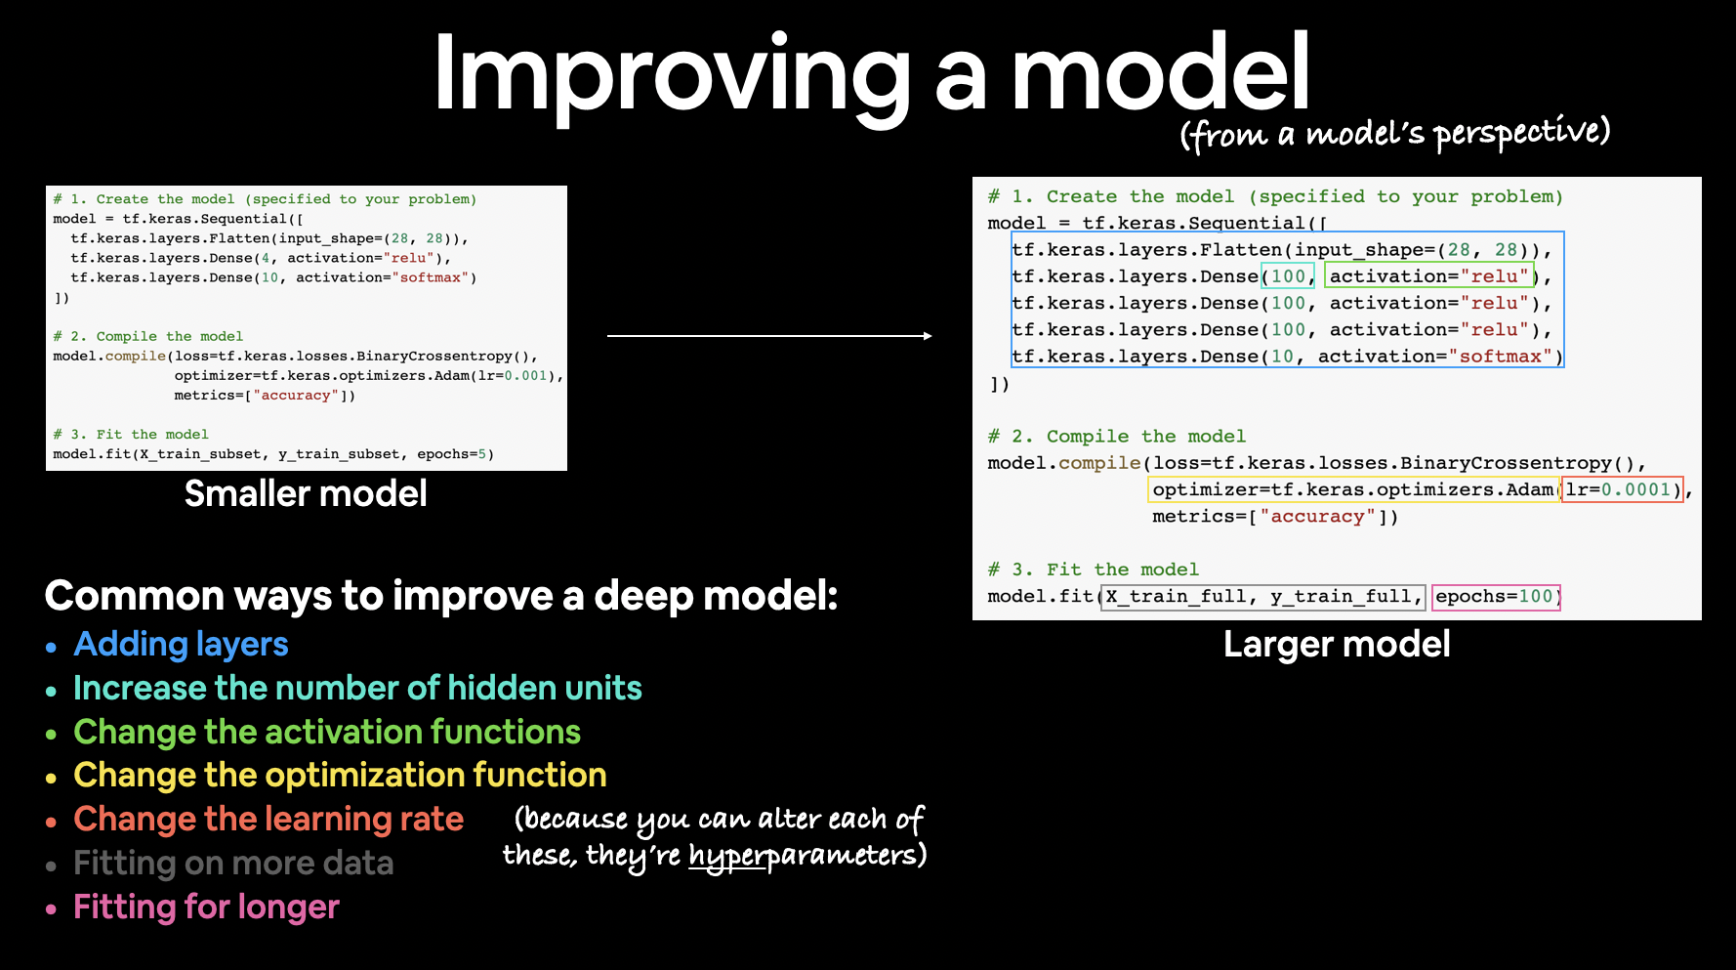

In [13]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.  Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 10.0604 - mae: 10.0604
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9279 - mae: 9.9279
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7954 - mae: 9.7954
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6629 - mae: 9.6629
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.5304 - mae: 9.5304
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3979 - mae: 9.3979
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.2654 - mae: 9.2654
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.1329 - mae: 9.1329
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.0004 - mae: 9.0004
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8679 - mae: 8.8679
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.7354 - mae: 8.7354
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6029 - mae: 8.6029
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

In [14]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Let's see if our model's prediction has improved...
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[30.004032]], dtype=float32)

Much better! We got closer this time. But we could still be better.

In [16]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 12.7664 - mae: 12.7664
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.3072 - mae: 12.3072
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.8382 - mae: 11.8382
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.3554 - mae: 11.3554
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.8555 - mae: 10.8555
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.3383 - mae: 10.3383
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7970 - mae: 9.7970
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2267 - mae: 9.2267
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.6254 - mae: 8.6254
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9819 - mae: 7.9819
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2918 - mae: 7.2918
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5485 - mae: 6.5485
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [17]:
# Let's see if our model's prediction has improved...
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[32.218075]], dtype=float32)

It seems our previous model did better! 30.14 was closer to the actual value 27, even though the loss in mae are lower this time. It means our model is overfitting. It is learning the training data too well. The error the model is producing during training is not a really valid representation. The real way we evaluate our machine learning model is not the metrics it gives us from the training data. It is the metrics that we get from the data it has never seen before.

In [18]:
# Let's update our model by decreasing the number of nurons in the hidden layer, from 100 to 50

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 14.1285 - mae: 14.1285
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.7143 - mae: 13.7143
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.3096 - mae: 13.3096
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.8991 - mae: 12.8991
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.4876 - mae: 12.4876
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.0725 - mae: 12.0725
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.6617 - mae: 11.6617
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2265 - mae: 11.2265
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.7732 - mae: 10.7732
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.3169 - mae: 10.3169
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8315 - mae: 9.8315
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.3099 - mae: 9.3099
Epoch 13/100
1/1 ━━━━━━━━━━━

In [19]:
# Let's see if our model's prediction has improved...
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[31.711687]], dtype=float32)

No! The model prediction is even far away from the actual value than the previous model. Our 2nd model is still better.

In [20]:
# Let's update our model by changing the activation function used in the hidden layer, from "relu" to None & keep the number of neurons=50

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - loss: 14.4912 - mae: 14.4912
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.9407 - mae: 13.9407
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.3940 - mae: 13.3940
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.8482 - mae: 12.8482
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.3006 - mae: 12.3006
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.7483 - mae: 11.7483
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.1884 - mae: 11.1884
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.6181 - mae: 10.6181
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.0343 - mae: 10.0343
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4341 - mae: 9.4341
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8144 - mae: 8.8144
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1720 - mae: 8.1720
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

We can see the loss has increased to 5.2122 from 3.68

In [21]:
# Let's check if our model is performing better this time or not
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[29.043306]], dtype=float32)

Nice! This time the model has performed better than our 2nd model. This prediction is closer to the actual value 27.0

In [22]:
# Let's update our model again by changing the optimizer, from "SGD" to "Adam"

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 13.6820 - mae: 13.6820
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.6086 - mae: 13.6086
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.5351 - mae: 13.5351
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.4616 - mae: 13.4616
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.3882 - mae: 13.3882
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.3148 - mae: 13.3148
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.2413 - mae: 13.2413
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.1679 - mae: 13.1679
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.0944 - mae: 13.0944
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.0210 - mae: 13.0210
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.9475 - mae: 12.9475
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.8741 - mae: 12.8741
Epoch 13/100
1/1 ━━━━━━━

In [23]:
# Let's see if this model performs better or not
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[31.696386]], dtype=float32)

No! It performed worse than the previous one. The prediction is far away from the actual value 27.0.

In [24]:
# Let's update our model again by providing the learning rate = 0.01 inside the "Adam" optimizer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 15.1990 - mae: 15.1990
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.4866 - mae: 14.4866
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.8590 - mae: 13.8590
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.2347 - mae: 13.2347
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.6105 - mae: 12.6105
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9843 - mae: 11.9843
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.3541 - mae: 11.3541
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.7177 - mae: 10.7177
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.0722 - mae: 10.0722
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4147 - mae: 9.4147
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7421 - mae: 8.7421
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0512 - mae: 8.0512
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [25]:
# Let's check if the model has performed better than all the previous models or not
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[27.863588]], dtype=float32)

Nice! This model performed better than every other model. The prediction is much closer to the actual value 27.0

In [26]:
# Let's update our model again by decreasing the learning rate to 0.001

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 15.5202 - mae: 15.5202
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.4160 - mae: 15.4160
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.3119 - mae: 15.3119
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.2078 - mae: 15.2078
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.1039 - mae: 15.1039
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.0000 - mae: 15.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.8987 - mae: 14.8987
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.8256 - mae: 14.8256
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.7537 - mae: 14.7537
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.6826 - mae: 14.6826
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.6121 - mae: 14.6121
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.5422 - mae: 14.5422
Epoch 13/100
1/1 ━━━━━━━━━

In [27]:
# Let's check if this model performs better or not
model.predict(tf.constant([17.0], dtype=tf.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[22.777773]], dtype=float32)

No! This model performed worse than the previous one. So, till now the model with 1 hidden layer with 50 neurons & None activation function, Adam optimizer with learning rate 0.01 & 100 epochs, performed the best with prediction value 25.62 (actual value 27.0).

<h3 style="color:orange">Evaluating a model</h3>

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> Fit it -> Evaluate it -> Tweak the model -> Fit it -> Evaluate it -> Tweak the model -> Fit it -> Evaluate it...
```

When it comes to evaluation, there are 3 words to memorize:

> "Visualize, Visualize & Visualize"

It is a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does a model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [28]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [29]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

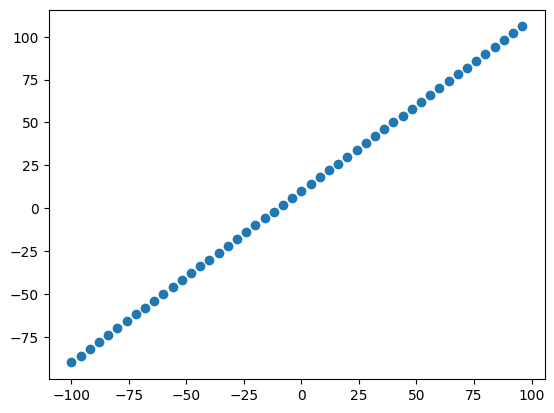

In [30]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets... (Split data into training/test set)

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

* **Training set** - The model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

🔑 When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [31]:
# check the length of how many samples we have
len(X)

50

In [32]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets. Let's visualize it again!

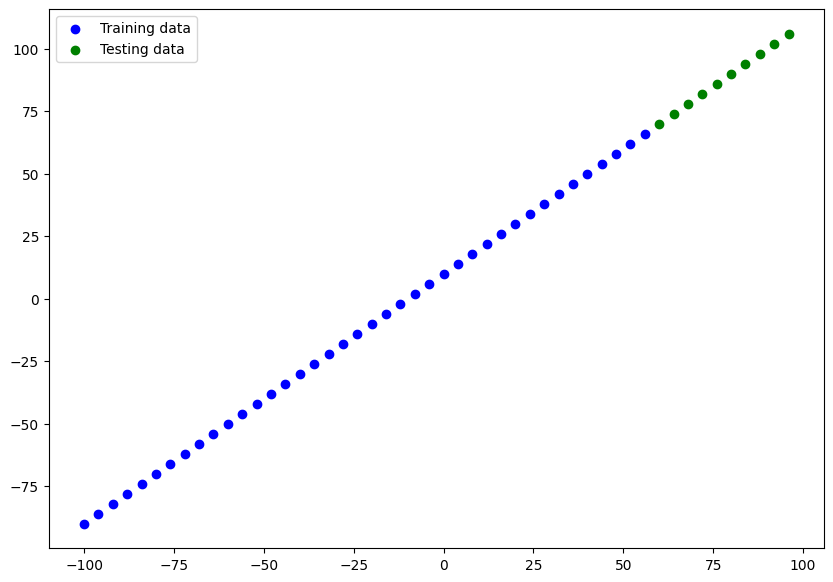

In [33]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend() 

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

In [34]:
# Let's have a look at how to build a neural network for our data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

<h3 style="color:orange">Visualizing the model</h3>

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling `summary()` on it.

📌 Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [35]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [36]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/Users/abhinandansamal/Certifications/Udemy/TensorFlow_for_Deep_Learning_Bootcamp/tensorflow-learn/tfbootcamp/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

* **Total params** - Total number of parameters in the model.
* **Trainable params** - These are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - These parameters aren't updated during training (This is typical when you bring in the already learned patterns from other models during transfer learning).

Considering our simple linear regression model with one input and one output, the architecture looks like this:
1. Input Layer: Accepts one feature.
2. Dense Layer: One neuron (output unit) that computes the weighted sum of inputs and adds a bias.

**Explanation of abobe model.summary() Output**:

1. **Model Name**: The name of the model, here it is "sequential_18".
2. **Layer (type)**: This section lists each layer in the model along with its type. In this case, we have:
    * `dense_24 (Dense)`: A dense layer (fully connected layer).
3. **Output Shape**: This indicates the shape of the output from each layer.
    * For the dense layer, it outputs a shape of "(None, 1)". Here "None" indicates that the batch size can be any number, and "1" is the number of output neurons (since we have one output).
4. **Param #**: This shows the number of parameters (weights and biases) in each layer.
    * For the dense layer, it has 2 parameters:
        * 1 weight for the single input feature (since it is a simple linear regression with one feature).
        * 1 bias term.

**Summary of Parameters**:
* **Total params**: This is the total number of parameters in the model, which is "2" (1 weight + 1 bias).
* **Trainable params**: These are the parameters that will be updated during training, which is also "2" in this case.
* **Non-trainable params**: These are parameters that are not updated during training, which is "0" in this case.

**Simple Visualization**:

        Input (X) --> (Weight + Bias) --> Output (y)

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's Introduction to Deep Learning video](https://www.youtube.com/watch?v=ErnWZxJovaM).

In [38]:
# Let's fit our model to the training data
# model.fit(X_train, y_train, epochs=100, verbose=0) # with verbose=0

The `verbose` parameter in the `model.fit()` method in TensorFlow's Keras API controls the level of logging or output you see during model training. It helps manage the amount of information displayed during each epoch of the training process. Here are the possible values for verbose and what they mean:

1. `verbose=0`: No output will be shown during training. This is useful when you want to run the training silently without any logs, especially when you don't need to monitor the training process or when logging can clutter your output (e.g., when running in a production environment or automated pipeline).
2. `verbose=1`: Displays a progress bar for each epoch. This is the default setting and provides a nice overview of the training process, showing the progress of each epoch, along with metrics like loss and accuracy (if specified). It is useful for interactive environments like Jupyter Notebooks or during initial model development.

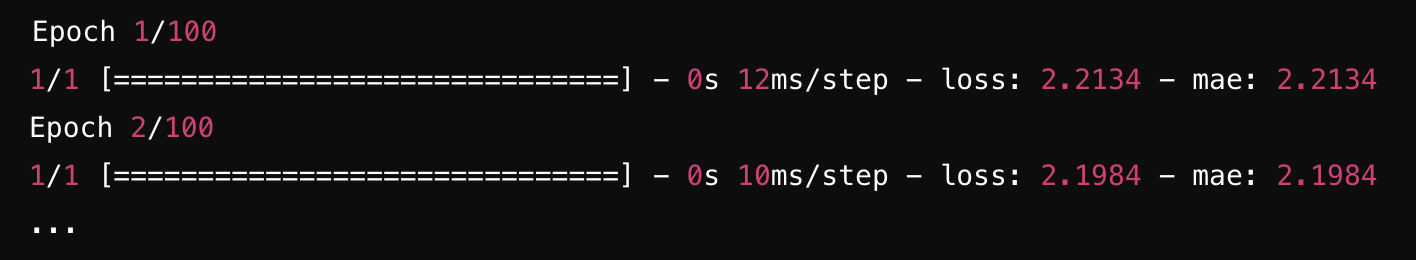

3. `verbose=2`: Displays one line per epoch. Instead of showing a progress bar, this setting prints a more concise summary for each epoch. This can be useful when running on a terminal or when you want a more compact output than the progress bar.

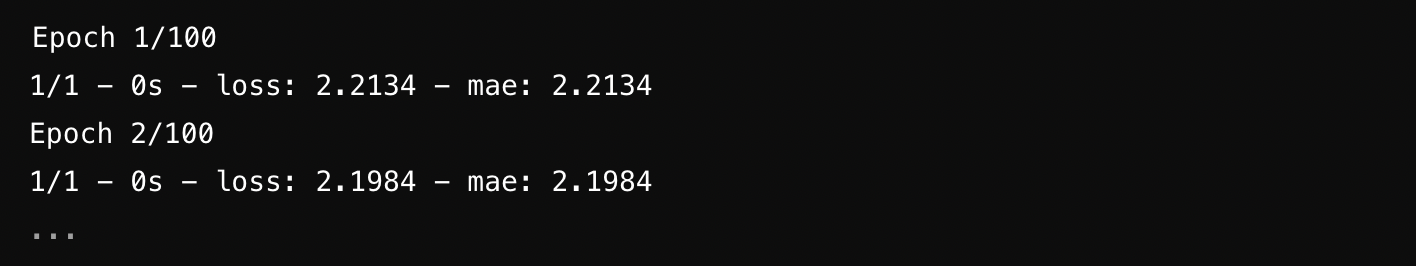

In [39]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.6237 - mae: 83.6237  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.4933 - mae: 48.4933 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.7907 - mae: 15.7907 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.0784 - mae: 10.0784
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6726 - mae: 7.6726 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9442 - mae: 11.9442 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0398 - mae: 8.0398 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7499 - mae: 9.7499 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0219 - mae: 8.0219 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7382 - mae: 9.7382 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0041 - mae: 8.0041 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7266 - mae: 9.7266 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

Alongside summary, you can also view a 2D plot of the model using `plot_model()`.

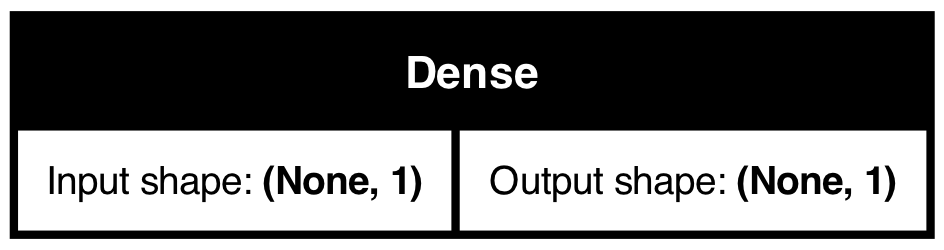

In [40]:
# Plot the model
tf.keras.utils.plot_model(model=model, show_shapes=True)

In [41]:
# Let's create another model by updating the model input layer

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/Users/abhinandansamal/Certifications/Udemy/TensorFlow_for_Deep_Learning_Bootcamp/tensorflow-learn/tfbootcamp/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# model summary
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

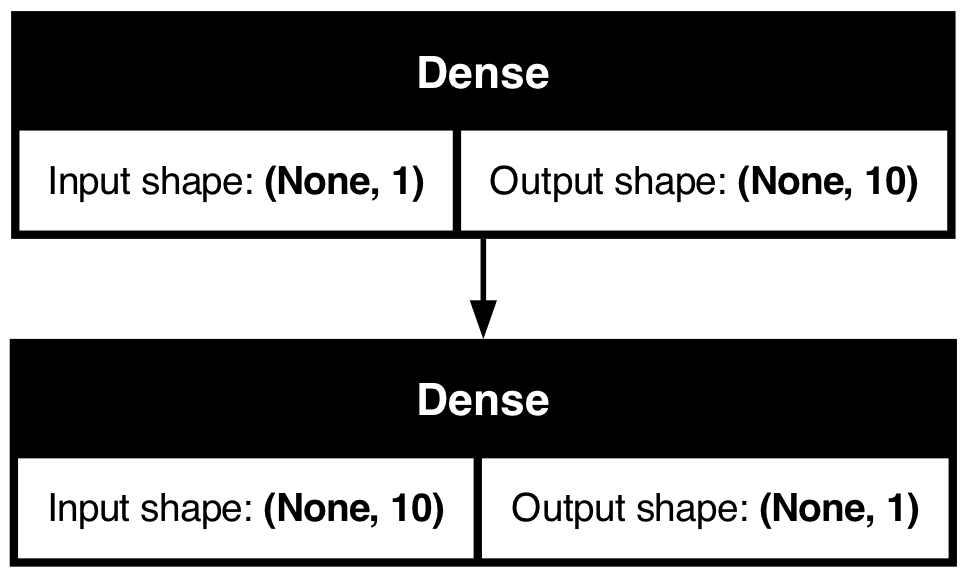

In [44]:
# plot the model
tf.keras.utils.plot_model(model=model, show_shapes=True)

<h3 style="color:orange">Visualizing model's predictions</h3>

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of "y_test" or "y_true" versus "y_pred" (ground truth versus the model's predictions).

In [45]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[39.631638],
       [42.165672],
       [44.6997  ],
       [47.233734],
       [49.76776 ],
       [52.3018  ],
       [54.83583 ],
       [57.369865],
       [59.903893],
       [62.437923]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [47]:
# Let's create a plotting function
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot the training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

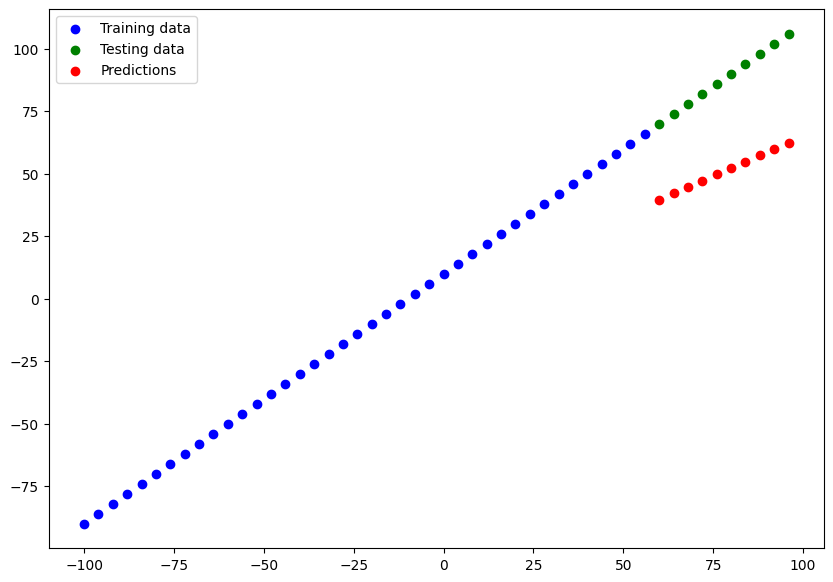

In [48]:
plot_predictions(X_train, 
                 y_train, 
                 X_test, 
                 y_test, 
                 y_pred)

In [49]:
# Let's improve the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Users/abhinandansamal/Certifications/Udemy/TensorFlow_for_Deep_Learning_Bootcamp/tensorflow-learn/tfbootcamp/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5298 - mae: 17.5298  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.7434 - mae: 10.7434 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0825 - mae: 8.0825
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6605 - mae: 9.6605
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5955 - mae: 9.5955
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5151 - mae: 8.5151 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2761 - mae: 7.2761 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0707 - mae: 8.0707 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0223 - mae: 8.0223
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2440 - mae: 7.2440
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3390 - mae: 7.3390
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5489 - mae: 7.5489 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.98

In [50]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [51]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[ 71.85651 ],
       [ 75.98423 ],
       [ 80.11195 ],
       [ 84.239685],
       [ 88.367386],
       [ 92.4951  ],
       [ 96.62283 ],
       [100.75056 ],
       [104.87827 ],
       [109.006   ]], dtype=float32)

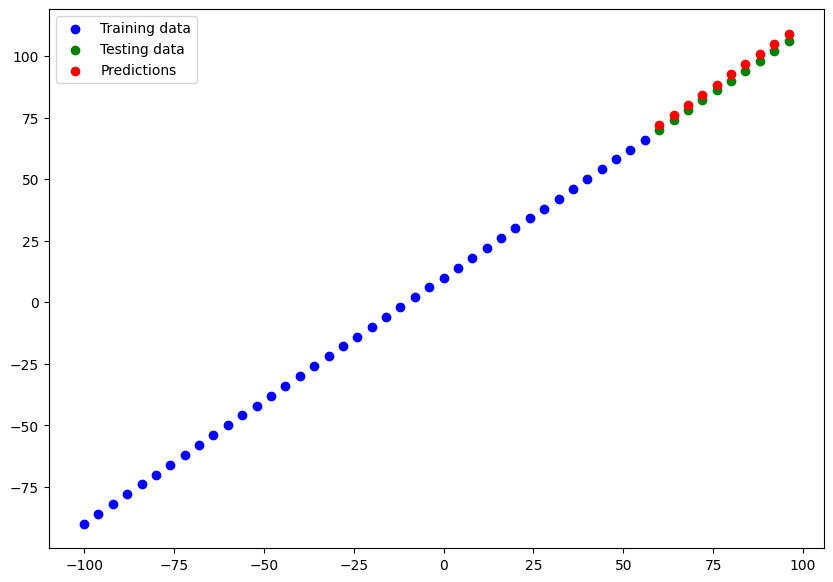

In [52]:
plot_predictions(X_train, 
                 y_train, 
                 X_test, 
                 y_test, 
                 y_pred)

<h3 style="color:orange">Evaluating model's predictions with regression evaluation metrics</h3>

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance. 

Since we're working on a regression problem, three of the main metrics:
* **MAE** - Mean Absolute Error, "on average, how wrong is each of the model's predictions". A great starter metric for any regression problem. `tf.keras.losses.MAE()` - https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAE
* **MSE** - Mean Squared Error, "square the average error" (use if larger errors are more detrimental than smaller errors). `tf.keras.losses.MSE()` - https://www.tensorflow.org/api_docs/python/tf/keras/losses/MSE
* **Huber** - Combination of MSE and MAE. Less sensitive to outliers than MSE. `tf.keras.losses.Huber()` - https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber

You can also use`model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [53]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 2.4313 - mae: 2.4313


[2.4312522411346436, 2.4312522411346436]

In [54]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 71.85651 ],
       [ 75.98423 ],
       [ 80.11195 ],
       [ 84.239685],
       [ 88.367386],
       [ 92.4951  ],
       [ 96.62283 ],
       [100.75056 ],
       [104.87827 ],
       [109.006   ]], dtype=float32)>

In [55]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [56]:
# Calculate the mean absoulte error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.8565063, 1.98423  , 2.1119537, 2.239685 , 2.3673859, 2.495102 ,
       2.6228333, 2.750557 , 2.878273 , 3.0059967], dtype=float32)>

As we can see, the shape of the y_pred & y_test tensors are different, we are getting mae like above. So, we have to squeeze the y_pred to get the shape of (10,).

In [57]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.85651 ,  75.98423 ,  80.11195 ,  84.239685,  88.367386,
        92.4951  ,  96.62283 , 100.75056 , 104.87827 , 109.006   ],
      dtype=float32)>

In [58]:
# Calculate the MAE
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.4312522>

In [59]:
# Calculate the MSE
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.0455666>

In [60]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - This might come in the form of more layers or more hidden units in each layer.
3. Train for longer - Give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [61]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [64]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Users/abhinandansamal/Certifications/Udemy/TensorFlow_for_Deep_Learning_Bootcamp/tensorflow-learn/tfbootcamp/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.4332 - mae: 15.4332  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7463 - mae: 9.7463
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0434 - mae: 8.0434
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7347 - mae: 9.7347 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0255 - mae: 8.0255
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7231 - mae: 9.7231 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0077 - mae: 8.0077
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7114 - mae: 9.7114
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9898 - mae: 7.9898 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6998 - mae: 9.6998 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9720 - mae: 7.9720 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6882 - mae: 9.6882 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.954

In [65]:
# Expand dimensions of the input data to match the expected input shape
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

In [76]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Users/abhinandansamal/Certifications/Udemy/TensorFlow_for_Deep_Learning_Bootcamp/tensorflow-learn/tfbootcamp/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.5874 - mae: 18.5874  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8845 - mae: 10.8845 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8138 - mae: 7.8138 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6739 - mae: 10.6739 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5585 - mae: 7.5585 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5558 - mae: 8.5558 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0245 - mae: 10.0245
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.7311 - mae: 11.7311
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6655 - mae: 8.6655
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1343 - mae: 10.1343
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8767 - mae: 11.8767 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7753 - mae: 8.7753
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


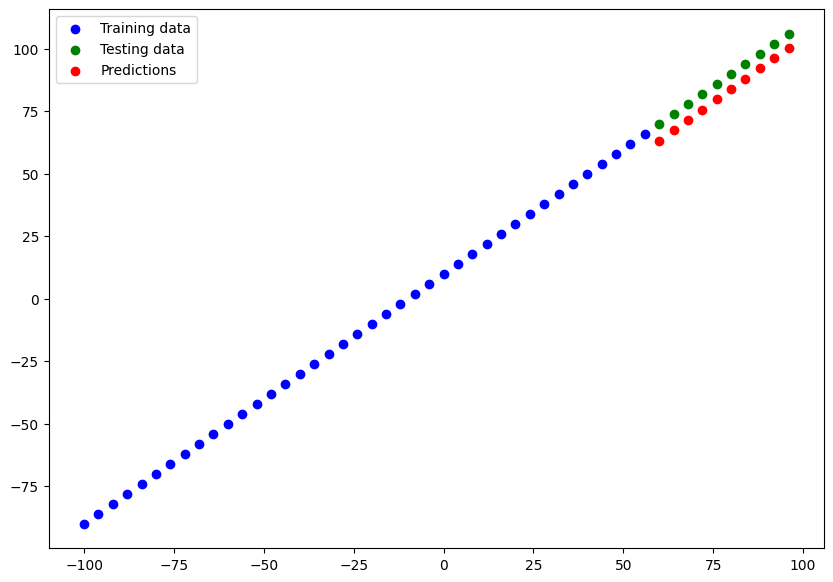

In [77]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)

plot_predictions(X_train, 
                 y_train, 
                 X_test, 
                 y_test, 
                 y_pred_1)

In [78]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.1692>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.18519>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [79]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.1957 - mae: 23.1957  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.9444 - mae: 20.9444
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5897 - mae: 20.5897
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5240 - mae: 21.5240
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4028 - mae: 14.4028 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.8226 - mae: 18.8226
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.8437 - mae: 13.8437
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.1681 - mae: 15.1681
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.0218 - mae: 11.0218
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8274 - mae: 14.8274
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.8912 - mae: 10.8912
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.6982 - mae: 14.6982 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


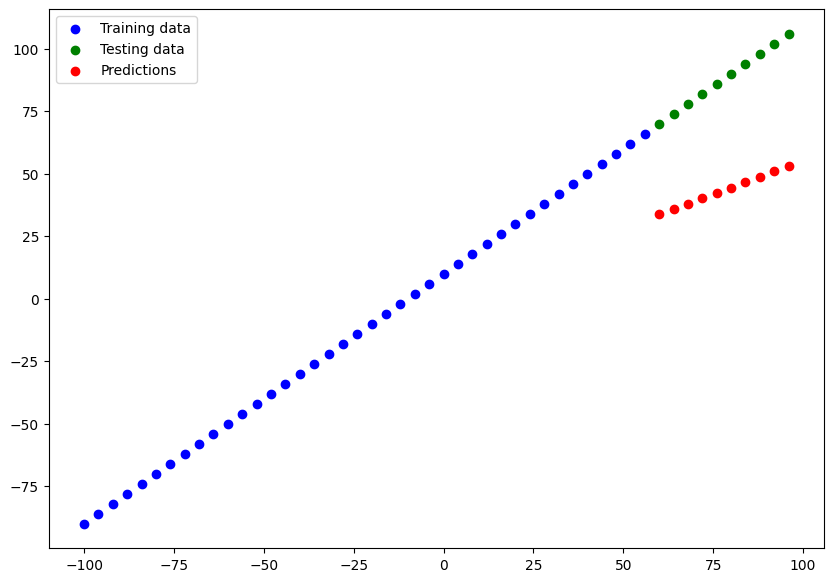

In [80]:
# Make and Plot predictions of model_2
y_pred_2 = model_2.predict(X_test)

plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 y_pred_2)

In [81]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.573822>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2015.1263>)

**Build model_3**

* 2 layers, trained for 500 epochs

In [82]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.0372 - mae: 41.0372  
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.9720 - mae: 31.9720
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.1414 - mae: 17.1414
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3779 - mae: 19.3779
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5876 - mae: 17.5876
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.8599 - mae: 16.8599 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.4212 - mae: 11.4212
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.2307 - mae: 15.2307 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.0141 - mae: 11.0141
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8157 - mae: 14.8157 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8117 - mae: 15.8117 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.0004 - mae: 12.0004 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


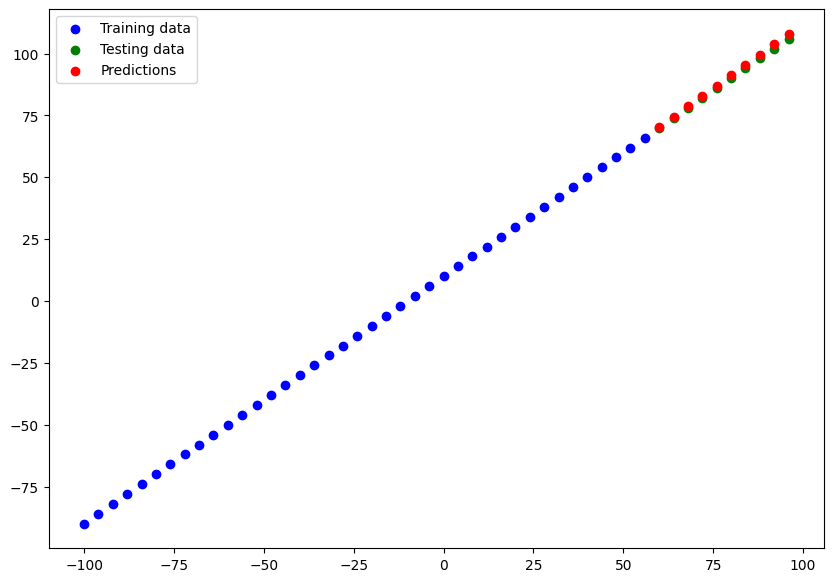

In [83]:
# Make & Plot predictions for model_3
y_pred_3 = model_3.predict(X_test)

plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 y_pred_3)

In [84]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.1010841>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.5229452>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

<h3 style="color:orange">Comparing the results of our experiments</h3>

We've run a few experiments, let's compare the results.

In [85]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,6.169200,38.185188
1,model_2,44.573822,2015.126343
2,model_3,1.101084,1.522945


Hence model_3 performed the best.

In [86]:
# Summary of model_3
model_3.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitinor's motto: "experiment, experiment, experiment".

<h3 style="color:orange">Tracking your experiments</h3>

One really good habit in machine learning modelling is to track the results of your experiments. And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments - https://www.tensorflow.org/tensorboard
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard) - https://wandb.ai/site

<h3 style="color:orange">Saving our models</h3>

Saving our models allows us to use them wherever they were trained, such as in a web application or a mobile app.

There are 2 main formats in which we can save our models:

1. The SavedModel format
2. The HDF5 format
3. .keras format

https://www.tensorflow.org/tutorials/keras/save_and_load

In [87]:
# Save model using the SavedModel format
model_3.export("saved_model/best_model_3")

INFO:tensorflow:Assets written to: saved_model/best_model_3/assets


INFO:tensorflow:Assets written to: saved_model/best_model_3/assets


Saved artifact at 'saved_model/best_model_3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_47')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  12939984960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12952083040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12939986544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12952082864: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [88]:
# Save model using HDF5 format
model_3.save("saved_model/best_model_3.h5")

In [89]:
# Save the entire model as a `.keras` zip archive.
model_3.save("saved_model/best_model_3.keras")


<h3 style="color:orange">Loading in a saved model</h3>

Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3.

In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(saved_model/best_model_3, call_endpoint='serving_default')`

In [90]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.layers.TFSMLayer("saved_model/best_model_3", call_endpoint='serving_default')

In [91]:
loaded_SavedModel_format

<TFSMLayer name=tfsm_layer, built=True>

In [92]:
# Load in the HDF5 format model
loaded_hdf5_format = tf.keras.models.load_model("saved_model/best_model_3.h5")
loaded_hdf5_format.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [93]:
# Compare model_3 predictions with HDF5 format model predictions
model_3_preds = model_3.predict(X_test)
loaded_hdf5_format_preds = loaded_hdf5_format.predict(X_test)

model_3_preds, loaded_hdf5_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(array([[ 70.228   ],
        [ 74.42201 ],
        [ 78.616035],
        [ 82.81006 ],
        [ 87.004074],
        [ 91.1981  ],
        [ 95.39211 ],
        [ 99.586136],
        [103.78015 ],
        [107.97417 ]], dtype=float32),
 array([[ 70.228   ],
        [ 74.42201 ],
        [ 78.616035],
        [ 82.81006 ],
        [ 87.004074],
        [ 91.1981  ],
        [ 95.39211 ],
        [ 99.586136],
        [103.78015 ],
        [107.97417 ]], dtype=float32))

In [94]:
model_3_preds == loaded_hdf5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [95]:
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_hdf5_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [96]:
# Loaded in the .keras format model
loaded_keras_format = tf.keras.models.load_model("saved_model/best_model_3.keras")
loaded_keras_format.summary()

/Users/abhinandansamal/Certifications/Udemy/TensorFlow_for_Deep_Learning_Bootcamp/tensorflow-learn/tfbootcamp/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

In [97]:
# Compare model_3 predictions with .keras format model predictions
model_3_preds = model_3.predict(X_test)
loaded_keras_format_preds = loaded_keras_format.predict(X_test)

model_3_preds, loaded_keras_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(array([[ 70.228   ],
        [ 74.42201 ],
        [ 78.616035],
        [ 82.81006 ],
        [ 87.004074],
        [ 91.1981  ],
        [ 95.39211 ],
        [ 99.586136],
        [103.78015 ],
        [107.97417 ]], dtype=float32),
 array([[ 70.228   ],
        [ 74.42201 ],
        [ 78.616035],
        [ 82.81006 ],
        [ 87.004074],
        [ 91.1981  ],
        [ 95.39211 ],
        [ 99.586136],
        [103.78015 ],
        [107.97417 ]], dtype=float32))

In [98]:
model_3_preds == loaded_keras_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [99]:
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_keras_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## A Larger Example - Insurance Forecast by using Linear Regression

Dataset Link: we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv). 

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

**Columns:**

* `age`: age of primary beneficiary
* `sex`: insurance contractor gender, female, male
* `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: Number of children covered by health insurance / Number of dependents
* `smoker`: Smoking
* `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* `charges`: Individual medical costs billed by health insurance

**Task:** Predict insurance cost.

In [100]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
insurance.shape

(1338, 7)

In [103]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=float)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [105]:
# Create X & y values (features and label)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [106]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [107]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [108]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [109]:
# Check the shapes of the data to ensure correctness
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1070, 11)
y_train shape: (1070,)
X_test shape: (268, 11)
y_test shape: (268,)


In [110]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 10227.9053 - mae: 10227.9053
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 7752.6211 - mae: 7752.6211
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 7454.1567 - mae: 7454.1567
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 7482.7500 - mae: 7482.7500
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 7303.8911 - mae: 7303.8911
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 7539.2808 - mae: 7539.2808
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 7888.3579 - mae: 7888.3579
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 7634.3862 - mae: 7634.3862
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 7454.2148 - mae: 7454.2148
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 7369.4966 - mae: 7369.4966
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 7546.0356 - mae: 7546.0356
Epoch 12/100
34/34 ━━━━━━━━━

In [111]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 8017.0020 - mae: 8017.0020


[7981.123046875, 7981.123046875]

Right now it looks like our model isn't performing too well. Let's try and improve it!

To improve our model, we'll run couple of experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. Update the optimizer to "Adam" & Train for longer

**insurance_model_2:**

* One extra layer with more number of neurons.
* Optimizer = SGD()

In [112]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 units
    tf.keras.layers.Dense(10), # 10 units
    tf.keras.layers.Dense(1) # 1 unit (for output layer)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: nan - mae: nan              
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: nan - mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: nan - mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: nan - mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: nan - mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: nan - mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: nan - mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: nan - mae: nan
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: nan - mae: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: nan - mae: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: nan - mae

By default, SGD might use a learning rate that is too high, causing large weight updates that can lead to numerical instability. This can result in the loss function producing nan values.

To potentially fix the issue with SGD, you can try lowering the learning rate.

In [113]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 units
    tf.keras.layers.Dense(10), # 10 units
    tf.keras.layers.Dense(1) # 1 unit (for output layer)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 11924.5430 - mae: 11924.5430
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 7431.3970 - mae: 7431.3970
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 7257.1045 - mae: 7257.1045
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 7298.1987 - mae: 7298.1987
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 7266.9307 - mae: 7266.9307
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 7128.2241 - mae: 7128.2241
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 7155.3936 - mae: 7155.3936
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 6988.2793 - mae: 6988.2793
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 7499.9775 - mae: 7499.9775
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 7476.6294 - mae: 7476.6294
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 7471.1812 - mae: 7471.1812
Epoch 12/100
34/34 ━━━━━━━━━

In [114]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 7944.5791 - mae: 7944.5791


[7889.5791015625, 7889.5791015625]

This model didn't performed much better than the previous one. Let's perform another experiment by tweeking the model.

**insurance_model_3:**

* One extra layer with more number of neurons
* Optimizer = Adam()

In [115]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 units
    tf.keras.layers.Dense(10), # 10 units
    tf.keras.layers.Dense(1) # 1 unit (for output layer)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't if you don't lower the learning rate
                          metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 13273.5498 - mae: 13273.5498 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 13136.1992 - mae: 13136.1992
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 12847.1572 - mae: 12847.1572
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 12256.6582 - mae: 12256.6582
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 11215.4463 - mae: 11215.4463
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 9782.9346 - mae: 9782.9346 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 8351.5557 - mae: 8351.5557
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 7532.6157 - mae: 7532.6157
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 7393.1768 - mae: 7393.1768
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 7365.6626 - mae: 7365.6626
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 7344.3979 - mae: 7344.3979
Epoch 12/100
34/34

In [116]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 4979.2344 - mae: 4979.2344


[4833.8369140625, 4833.8369140625]

This model performed better than the first model, but still we can try to improve our model.

**insurance_model_4:**

* One extra layer with more number of neurons
* Optimizer = Adam()
* Train for longer (Increase the epochs to 300) 

In [117]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=300)
history

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - loss: 13260.3486 - mae: 13260.3486 
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 13103.2285 - mae: 13103.2285
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 12777.5713 - mae: 12777.5713
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 12128.2236 - mae: 12128.2236
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 11020.3389 - mae: 11020.3389
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 9575.5654 - mae: 9575.5654
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 8207.3389 - mae: 8207.3389
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 7498.5762 - mae: 7498.5762
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 7387.1528 - mae: 7387.1528
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 7359.8032 - mae: 7359.8032
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 7337.5864 - mae: 7337.5864
Epoch 12/300
34/34 

In [118]:
insurance_model_4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 3210.0271 - mae: 3210.0271


[3165.1357421875, 3165.1357421875]

This model performed better than the previous one & this is the best model so far.

Text(0.5, 0, 'epochs')

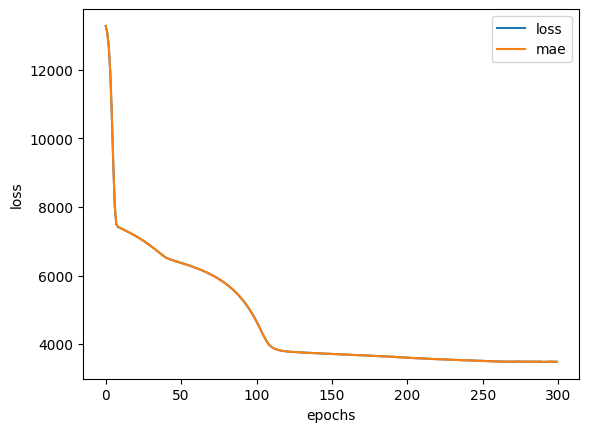

In [119]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. But TensorFlow has a solution! It is called the `EarlyStopping Callback`, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

### Preprocessing data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from Scikit-learn.

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)


# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [5]:
# What was our original data looking like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [6]:
# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [7]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_5.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 13297.7461 - mae: 13297.7461 
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 13291.4756 - mae: 13291.4756
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 13274.5137 - mae: 13274.5137
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 13236.4795 - mae: 13236.4795
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 13166.6699 - mae: 13166.6699
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 13054.5547 - mae: 13054.5547
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 12889.7354 - mae: 12889.7354
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 12661.7490 - mae: 12661.7490
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 12360.4756 - mae: 12360.4756
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 11978.1289 - mae: 11978.1289
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 11520.7598 - mae: 11520.7598
Epoch 12/300
34/34 

In [12]:
# Evaluate our insurance model trained on normalized data
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 3213.3132 - mae: 3213.3132


[3159.77734375, 3159.77734375]

In [13]:
# Insurance model 4 results
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 3210.0271 - mae: 3210.0271
# [3165.1357421875, 3165.1357421875]

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.

## Exercises